<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transform_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Joukowski Transform**

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as mpl
from IPython.display import display, Math
mpl.rcParams["figure.figsize"] = (5, 5)
%config InlineBackend.figure_formats = ['svg']

In [8]:
α, β, θ, 𝜋, ξ, ζ, ρ, Δr, Δi = symbols( r"\alpha, \beta, \theta, \pi, \xi, \zeta, \rho, \Delta{r}, \Delta{i}" )
a, c, CL, Cp = symbols( r"a, c, C_\mathrm{L}, C_\mathrm{p}" )
Uζ = symbols( r"U_{\zeta}" )

In [3]:
Wξ = exp( -I*α ) * ξ + exp( -I*α ) * a**2 / ξ + I * 2 * a * sin( α + β) * ln( ξ )
Wξ

\xi*exp(-I*\alpha) + 2*I*a*log(\xi)*sin(\alpha + \beta) + a**2*exp(-I*\alpha)/\xi

In [10]:
Wζ = Wξ.subs( ξ, ζ-c )
Wζ

a**2*exp(-I*\alpha)/(\zeta - c) + 2*I*a*log(\zeta - c)*sin(\alpha + \beta) + (\zeta - c)*exp(-I*\alpha)

In [22]:
Eq1 = Eq( Uζ, Wζ.diff( ζ ) )
Eq1

Eq(U_{\zeta}, -a**2*exp(-I*\alpha)/(\zeta - c)**2 + 2*I*a*sin(\alpha + \beta)/(\zeta - c) + exp(-I*\alpha))

In [47]:
repl_defs = { a: sqrt( (1-Δr)**2 + Δi**2 ), c: Δr + Δi*I, β: atan2( Δi, (1-Δr) ), ζ: a*exp( I*θ ) }

Eq3 = Eq1.subs( repl_defs )
Eq3

Eq(U_{\zeta}, 2*I*sqrt(\Delta{i}**2 + (1 - \Delta{r})**2)*sin(\alpha + atan2(\Delta{i}, 1 - \Delta{r}))/(-I*\Delta{i} - \Delta{r} + sqrt(\Delta{i}**2 + (1 - \Delta{r})**2)*exp(I*\theta)) - (\Delta{i}**2 + (1 - \Delta{r})**2)*exp(-I*\alpha)/(-I*\Delta{i} - \Delta{r} + sqrt(\Delta{i}**2 + (1 - \Delta{r})**2)*exp(I*\theta))**2 + exp(-I*\alpha))

In [48]:
repl_data = { Δr: -0.1, Δi: 0.1, α:6*pi/180.0 }
Eq4 = Eq3.subs( repl_data )
Eq4

Eq(U_{\zeta}, exp(-0.0333333333333333*I*pi) + 2.20907220343745*I*sin(0.0906598872007451 + 0.0333333333333333*pi)/(1.10453610171873*exp(I*\theta) + 0.1 - 0.1*I) - 1.0*exp(-0.0333333333333333*I*pi)/(exp(I*\theta) + 0.0905357460425185 - 0.0905357460425185*I)**2)

In [55]:
fUζ = lambdify( θ, Eq4.rhs, 'numpy')
θ_vec = np.linspace( 0.0, 2*np.pi, 101 )
Uζ_vec = fUζ(θ_vec)
Uζ2_vec = ( Uζ_vec * np.conj(Uζ_vec) ).real

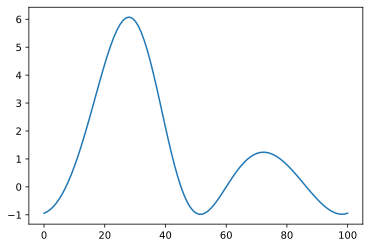

In [56]:
Cp = -(1.0 - Uζ2_vec)
mpl.plot( Cp );